In [1]:
import requests
from pattern import web
from bs4 import BeautifulSoup

# Scrapping Demo

## Task

Find and print the movie title, list of genres, runtime, and score of all movies on [this page](http://www.imdb.com/search/title?at=0&sort=num_votes,desc&start=1&title_type=feature&year=1940,2015)

### Base URL and params

In [2]:
url = 'http://www.imdb.com/search/title'
params = dict(sort='num_votes,desc', start=5551, title_type='feature', year='1940,2015')

r = requests.get(url, params=params)
print r.url  # notice it constructs the full url for you

http://www.imdb.com/search/title?sort=num_votes%2Cdesc&start=5551&title_type=feature&year=1940%2C2015


## Using Pattern

Selection in pattern follows the rules of CSS:

In [3]:
dom = web.Element(r.text)

for movie in dom.by_tag('tr.detailed'):
    title = movie.by_tag('td.title')[0]
    imdbID = title.by_tag('a')[0].href.replace('/title/', '').strip('/')
    name = web.plaintext(title.by_tag('a')[0].content)
    year = title.by_tag('span.year_type')[0].content
    genres = title.by_tag('span.genre')[0].by_tag('a')
    genres = [g.content for g in genres]
    try:
        runtime = title.by_tag('span.runtime')[0].content
    except IndexError:
        runtime = "NA"
    rating = title.by_tag('span.value')[0].content
    votes = movie.by_tag('td.sort_col')[0].content
    print imdbID, name, year, genres, runtime, rating, votes

tt0893412 From Prada to Nada (2011) [u'Comedy', u'Drama', u'Romance'] 107 mins. 5.5 10,795
tt0452643 Love and Other Disasters (2006) [u'Comedy', u'Romance'] 90 mins. 6.3 10,788
tt1847731 Tomboy (2011) [u'Drama'] 82 mins. 7.4 10,792
tt0102951 Soapdish (1991) [u'Comedy', u'Romance'] 97 mins. 6.5 10,785
tt0101787 Dying Young (1991) [u'Drama', u'Romance'] 111 mins. 5.9 10,778
tt0496436 White Noise 2: The Light (2007) [u'Drama', u'Horror', u'Thriller'] 99 mins. 5.8 10,776
tt1029120 Henry Poole Is Here (2008) [u'Comedy', u'Drama'] 99 mins. 6.5 10,773
tt0805526 Facing the Giants (2006) [u'Drama', u'Sport'] 111 mins. 6.6 10,779
tt0365847 The Myth (2005) [u'Action', u'Adventure', u'Comedy', u'Drama', u'Fantasy'] 122 mins. 6.1 10,770
tt0090583 About Last Night... (1986) [u'Comedy', u'Drama', u'Romance'] 113 mins. 6.1 10,769
tt0265808 Stealing Harvard (2002) [u'Comedy', u'Crime'] 85 mins. 5.1 10,763
tt0067277 Johnny Got His Gun (1971) [u'Drama', u'War'] 111 mins. 7.9 10,757
tt0810823 The Deaths o

### Scrape to a file

Let us now scrape the first 10,000 results into a tab delimited file:

In [4]:
with open ('../data/imdb.txt','a') as file:
    for start in range(1,10000,50):
        params = dict(sort='num_votes,desc', start=start, title_type='feature', year='1940,2015')
        r = requests.get(url, params=params)
        dom = web.Element(r.text)
        for movie in dom.by_tag('tr.detailed'):
            title = movie.by_tag('td.title')[0]
            imdbID = title.by_tag('a')[0].href.replace('/title/', '').strip('/')
            name = web.plaintext(title.by_tag('a')[0].content).encode('utf8')
            year = title.by_tag('span.year_type')[0].content
            genres = title.by_tag('span.genre')[0].by_tag('a')
            genres =  "|".join([g.content for g in genres])
            try:
                runtime = title.by_tag('span.runtime')[0].content
            except IndexError:
                runtime = "NA"
            rating = title.by_tag('span.value')[0].content
            votes = movie.by_tag('td.sort_col')[0].content
            file.write("{}\t{} {}\t{}\t{}\t{}\t{}\t{}\n".format(imdbID, name, year, year, rating, runtime, genres, votes))

## Using BeautifulSoup

Using `find` and `findAll`:

In [5]:
bs = BeautifulSoup(r.text)

for movie in bs.findAll('td', 'title'):
    title = movie.find('a').contents[0]
    genres = movie.find('span', 'genre').findAll('a') 
    genres = [g.contents[0] for g in genres]
    runtime = movie.find('span', 'runtime').contents[0]
    rating = movie.find('span', 'value').contents[0]
    print title, genres, runtime, rating

The Devil's Brigade [u'War'] 130 mins. 6.8
Lassie Come Home [u'Adventure', u'Family'] 89 mins. 7.2
Snowroller - Sällskapsresan II [u'Comedy'] 91 mins. 6.5
Closing the Ring [u'Drama', u'Romance'] 118 mins. 6.6
Enemies Closer [u'Action', u'Thriller'] 85 mins. 5.1
Q & A [u'Crime', u'Drama'] 132 mins. 6.5
Cyclo [u'Crime', u'Drama'] 123 mins. 7.4
Don't Bother to Knock [u'Drama', u'Film-Noir', u'Thriller'] 76 mins. 6.9
The Hitch-Hiker [u'Crime', u'Film-Noir', u'Thriller'] 71 mins. 7.0
Sky Fighters [u'Adventure', u'Action'] 102 mins. 5.7
High Road to China [u'Adventure', u'Drama', u'Romance', u'War'] 105 mins. 5.9
Scandal [u'Drama', u'History'] 115 mins. 6.4
Squirm [u'Horror'] 92 mins. 4.4
Little Nikita [u'Drama', u'Thriller'] 98 mins. 6.0
Sunday Bloody Sunday [u'Drama'] 110 mins. 7.3
Dying Breed [u'Horror', u'Thriller'] 92 mins. 5.4
I Dreamed of Africa [u'Adventure', u'Drama', u'Romance'] 114 mins. 5.5
Black or White [u'Drama'] 121 mins. 6.5
The Haunted Palace [u'Horror'] 87 mins. 6.8
The Tr

All scrapping follows the same pattern. Finding out which DOM tag we need and then looping over and stripping out everything else.

At the end this is how you should feel:
![Success Kid](http://i1.kym-cdn.com/photos/images/original/000/185/885/SANDCASTLES.png)

# Wrangling Demo

To get started let's import the libraries we will need and minimize matplotlib's chart junk:

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#tell pandas to display wide tables as pretty HTML tables
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()

The basic workflow pattern is as follows:

1. **Build** a DataFrame from the data (ideally, put *all* data in this object)
2. **Clean** the DataFrame. It should have the following properties:
   * Each row describes a single object
   * Each column describes a property of that object
   * Columns are numeric whenever appropriate
   * Columns contain atomic properties that cannot be further decomposed
3. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
4. Explore **group properties**. Use `groupby` and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of  the data's properties, and likely generates several questions for you to followup in subsequent analysis.

Here's a preview of the raw data we'll use -- it's a list of the 10,000 movies made since 1940 with the most IMDB user ratings.

In [7]:
!head ../data/imdb_top_10000.txt

tt0111161	The Shawshank Redemption (1994)	(1994)	9.3	142 mins.	Crime|Drama	1,434,256
tt0468569	The Dark Knight (2008)	(2008)	9.0	152 mins.	Action|Crime|Drama	1,404,761
tt1375666	Inception (2010)	(2010)	8.8	148 mins.	Action|Mystery|Sci-Fi|Thriller	1,203,863
tt0137523	Fight Club (1999)	(1999)	8.9	139 mins.	Drama	1,118,852
tt0110912	Pulp Fiction (1994)	(1994)	8.9	154 mins.	Crime|Drama	1,113,162
tt0120737	The Lord of the Rings: The Fellowship of the Ring (2001)	(2001)	8.8	178 mins.	Adventure|Fantasy	1,052,988
tt0167260	The Lord of the Rings: The Return of the King (2003)	(2003)	8.9	201 mins.	Adventure|Fantasy	1,026,828
tt0133093	The Matrix (1999)	(1999)	8.7	136 mins.	Action|Sci-Fi	1,023,145
tt0109830	Forrest Gump (1994)	(1994)	8.8	142 mins.	Drama|Romance	1,018,579
tt0068646	The Godfather (1972)	(1972)	9.2	175 mins.	Crime|Drama	985,270


Notice the runtime is currently a string rather than an integer number. The genres column is not atomic. Finally the movie year is repeated in the year and title column and the votes are represented as formated integers.

## 1. Build a DataFrame

The textfile is tab-separated, and doesn't have any column headers. We set the appropriate keywords in `pd.read_csv` to handle this:

In [8]:
col_names = ['imdbID', 'title', 'year', 'score','runtime','genres','votes']
data = pd.read_csv('../data/imdb_top_10000.txt', delimiter='\t', names=col_names, index_col='imdbID',na_values=['NA'])
print "Number of rows: %i" % data.shape[0]
data.head()

Number of rows: 10000


,title,year,score,runtime,genres,votes
imdbID,,,,,,
tt0111161,The Shawshank Redemption (1994),(1994),9.3,142 mins.,Crime|Drama,"1,434,256"
tt0468569,The Dark Knight (2008),(2008),9.0,152 mins.,Action|Crime|Drama,"1,404,761"
tt1375666,Inception (2010),(2010),8.8,148 mins.,Action|Mystery|Sci-Fi|Thriller,"1,203,863"
tt0137523,Fight Club (1999),(1999),8.9,139 mins.,Drama,"1,118,852"
tt0110912,Pulp Fiction (1994),(1994),8.9,154 mins.,Crime|Drama,"1,113,162"


## 2. Clean the DataFrame

There are several problems with the DataFrame at this point:

1. The runtime column describes a number, but is stored as a string
2. The genres column is not atomic -- it aggregates several genres together. This makes it hard, for example, to extract which movies are Comedies.
3. The movie year is repeated in the title and year column

### Fixing the runtime column

The following snipptet converts a string like '142 mins.' to the number 142:

In [9]:
runtime = '142 mins.'
number, unit = runtime.split(' ')
print int(number)

142


We can package this up into a list comprehension:

In [10]:
data['runtime'] = data['runtime'].dropna().map(lambda x: int(x.split(' ')[0]))
print "Number of rows: %i" % data.shape[0]
data.head()                                              

Number of rows: 10000


,title,year,score,runtime,genres,votes
imdbID,,,,,,
tt0111161,The Shawshank Redemption (1994),(1994),9.3,142,Crime|Drama,"1,434,256"
tt0468569,The Dark Knight (2008),(2008),9.0,152,Action|Crime|Drama,"1,404,761"
tt1375666,Inception (2010),(2010),8.8,148,Action|Mystery|Sci-Fi|Thriller,"1,203,863"
tt0137523,Fight Club (1999),(1999),8.9,139,Drama,"1,118,852"
tt0110912,Pulp Fiction (1994),(1994),8.9,154,Crime|Drama,"1,113,162"


### Splitting up the genres
We can use the concept of *indicator variables* to split the genres column into many columns. Each new column will correspond to a single genre, and each cell will be True or False.

In [11]:
#determine all the unique genres
genres = set()
for m in data.genres:
    genres.update(g for g in m.split('|'))

genres = sorted(genres)

#make a column for each genres
for genre in genres:
    data[genre] = [genre in m.split('|') for m in data.genres]

data.head()

,title,year,score,runtime,genres,votes,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
imdbID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
tt0111161,The Shawshank Redemption (1994),(1994),9.3,142,Crime|Drama,"1,434,256",False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
tt0468569,The Dark Knight (2008),(2008),9.0,152,Action|Crime|Drama,"1,404,761",True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
tt1375666,Inception (2010),(2010),8.8,148,Action|Mystery|Sci-Fi|Thriller,"1,203,863",True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False
tt0137523,Fight Club (1999),(1999),8.9,139,Drama,"1,118,852",False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
tt0110912,Pulp Fiction (1994),(1994),8.9,154,Crime|Drama,"1,113,162",False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### Removing year from the title
We can fix each element by stripping off the last 7 characters:

In [13]:
data['title'] = [t[0:-7] for t in data.title]
data.head()

,title,year,score,runtime,genres,votes,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
imdbID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
tt0111161,The Shawshank Redemption,(1994),9.3,142,Crime|Drama,"1,434,256",False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
tt0468569,The Dark Knight,(2008),9.0,152,Action|Crime|Drama,"1,404,761",True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
tt1375666,Inception,(2010),8.8,148,Action|Mystery|Sci-Fi|Thriller,"1,203,863",True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False
tt0137523,Fight Club,(1999),8.9,139,Drama,"1,118,852",False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
tt0110912,Pulp Fiction,(1994),8.9,154,Crime|Drama,"1,113,162",False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### Removing brackets around year
We can fix each element by getting the number from within the brackets:

In [14]:
data['year'] = [int(y.replace('(', '').strip(')')) for y in data.year]
data.head()

,title,year,score,runtime,genres,votes,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
imdbID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
tt0111161,The Shawshank Redemption,1994,9.3,142,Crime|Drama,"1,434,256",False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
tt0468569,The Dark Knight,2008,9.0,152,Action|Crime|Drama,"1,404,761",True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
tt1375666,Inception,2010,8.8,148,Action|Mystery|Sci-Fi|Thriller,"1,203,863",True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False
tt0137523,Fight Club,1999,8.9,139,Drama,"1,118,852",False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
tt0110912,Pulp Fiction,1994,8.9,154,Crime|Drama,"1,113,162",False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### Fixing votes format
We can fix each vote similarly to above:

In [15]:
data['votes'] = [int(v.replace(',', '')) for v in data.votes]
data.head()

,title,year,score,runtime,genres,votes,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
imdbID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
tt0111161,The Shawshank Redemption,1994,9.3,142,Crime|Drama,1434256,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
tt0468569,The Dark Knight,2008,9.0,152,Action|Crime|Drama,1404761,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
tt1375666,Inception,2010,8.8,148,Action|Mystery|Sci-Fi|Thriller,1203863,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False
tt0137523,Fight Club,1999,8.9,139,Drama,1118852,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
tt0110912,Pulp Fiction,1994,8.9,154,Crime|Drama,1113162,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## 3. Explore Global Properties

Next, we get a handle on some basic, global summaries of the DataFrame.

### Call `describe` on relevant columns

In [16]:
data[['year','score','votes','runtime']].describe()

,year,score,votes,runtime
count,10000.000000,10000.000000,10000.000000,9968.000000
mean,1995.985500,6.575040,43533.835700,107.854133
std,16.621068,1.086435,87569.574657,21.555782
min,1940.000000,1.600000,3401.000000,46.000000
25%,1989.000000,6.000000,5830.750000,94.000000
50%,2001.000000,6.700000,12812.000000,104.000000
75%,2008.000000,7.400000,40203.750000,117.000000
max,2015.000000,9.400000,1434256.000000,450.000000


### Make some basic plots

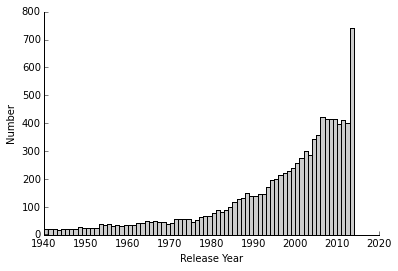

In [17]:
plt.hist(data.year,bins=np.arange(1940,2015),color='#cccccc')
plt.xlabel("Release Year")
plt.ylabel("Number")
remove_border()

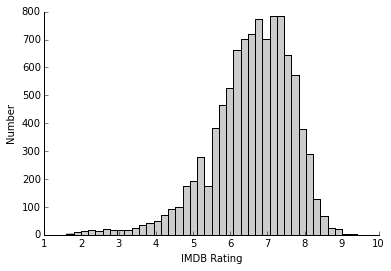

In [18]:
plt.hist(data.score, bins=40, color='#cccccc')
plt.xlabel("IMDB Rating")
plt.ylabel("Number")
remove_border()

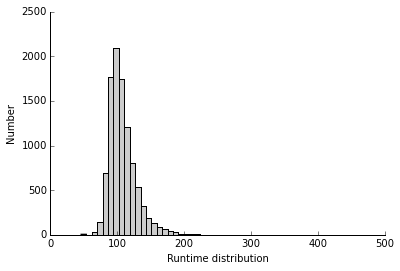

In [19]:
plt.hist(data.runtime.dropna(), bins=50, color='#cccccc')
plt.xlabel("Runtime distribution")
plt.ylabel("Number")
remove_border()

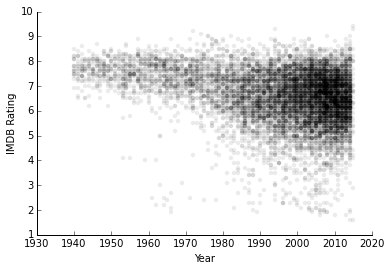

In [20]:
plt.scatter(data.year, data.score, lw=0, alpha=0.08, color='k')
plt.xlabel("Year")
plt.ylabel("IMDB Rating")
remove_border()

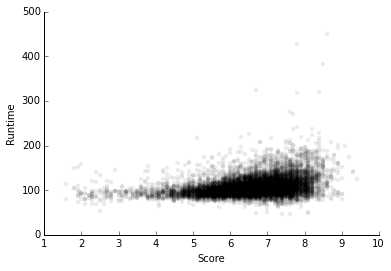

In [21]:
plt.scatter(data.score, data.runtime, lw=0, alpha=0.08, color='k')
plt.xlabel("Score")
plt.ylabel("Runtime")
remove_border()

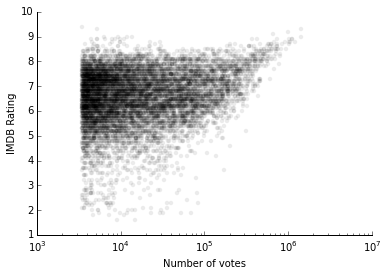

In [22]:
plt.scatter(data.votes, data.score, lw=0, alpha=0.08, color='k')
plt.xlabel("Number of votes")
plt.ylabel("IMDB Rating")
plt.xscale('log')
remove_border()

### Identify some outliers

In [23]:
data[(data.votes > 9e4) & (data.score < 5)][['title','year','score','votes','genres']]

,title,year,score,votes,genres
imdbID,,,,,
tt1259571,The Twilight Saga: New Moon,2009,4.6,201124,Adventure|Drama|Fantasy|Romance
tt0118688,Batman & Robin,1997,3.6,169303,Action
tt1325004,The Twilight Saga: Eclipse,2010,4.9,165479,Adventure|Drama|Fantasy|Romance
tt1324999,The Twilight Saga: Breaking Dawn - Part 1,2011,4.9,163994,Adventure|Drama|Fantasy|Romance
tt2322441,Fifty Shades of Grey,2015,4.2,138293,Drama|Romance
tt0120891,Wild Wild West,1999,4.8,119127,Action|Western|Comedy|Sci-Fi
tt0938283,The Last Airbender,2010,4.3,106900,Action|Adventure|Family|Fantasy
tt0305357,Charlie's Angels: Full Throttle,2003,4.8,93240,Action|Adventure|Comedy|Crime


In [24]:
data[data.score == data.score.min()][['title','year','score','votes','genres']]

,title,year,score,votes,genres
imdbID,,,,,
tt4458206,Kod Adi K.O.Z.,2015,1.6,14729,Crime|Mystery
tt4009460,Saving Christmas,2014,1.6,9002,Comedy|Family


In [25]:
data[data.score == data.score.max()][['title','year','score','votes','genres']]

,title,year,score,votes,genres
imdbID,,,,,
tt4523112,Selam: Bahara Yolculuk,2015,9.4,3473,Biography|Drama|History


In [26]:
data[data.runtime == data.runtime.max()][['title','year','runtime','score','votes','genres']]

,title,year,runtime,score,votes,genres
imdbID,,,,,,
tt0111341,Satantango,1994,450,8.6,5300,Comedy|Drama


### Run aggregation functions like `sum` over several rows or columns

*What genres are the most frequent?*

In [27]:
genres_count = pd.DataFrame({'Genre Count': data[genres].sum()})
genres_count.sort(columns='Genre Count',ascending=False)

,Genre Count
Drama,5573
Comedy,3834
Thriller,2871
Romance,2306
Action,2005
Crime,1885
Adventure,1356
Horror,1223
Mystery,1014
Sci-Fi,959


*How many genres does a movie have, on average?*

In [28]:
genres_count = data[genres].sum(axis=1)
print "Avg. movie has {} genres".format(genres_count.mean())
genres_count.describe()

Avg. movie has 2.7517 genres


count    10000.000000
mean         2.751700
std          1.169779
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         10.000000
dtype: float64

## Explore Group Properties

Let's split up movies by half-decades:

In [29]:
hdecades = (data.year //5)*5

tyd = data[['title', 'year']]
tyd['hdecades'] = hdecades

tyd.head()

/usr/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,title,year,hdecades
imdbID,,,
tt0111161,The Shawshank Redemption,1994,1990
tt0468569,The Dark Knight,2008,2005
tt1375666,Inception,2010,2010
tt0137523,Fight Club,1999,1995
tt0110912,Pulp Fiction,1994,1990


[GroupBy](http://pandas.pydata.org/pandas-docs/dev/groupby.html) will gather movies into groups with equal decade values:

In [30]:
hdecades_mean = data.groupby(hdecades).score.mean()
hdecades_mean.name = 'Half Decade mean score'
print hdecades_mean

year
1940    7.623469
1945    7.647863
1950    7.514685
1955    7.484971
1960    7.370588
1965    7.254709
1970    7.249434
1975    7.018855
1980    6.694266
1985    6.508683
1990    6.450311
1995    6.472678
2000    6.454241
2005    6.390976
2010    6.378626
2015    6.385294
Name: Half Decade mean score, dtype: float64


We can plot the mean score over the scatter plot:

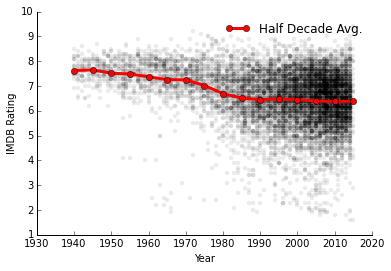

In [31]:
plt.plot(hdecades_mean.index, hdecades_mean.values, 'o-', color='r',
        lw=3, label='Half Decade Avg.')
plt.scatter(data.year, data.score, lw=0, alpha=0.08, color='k')
plt.xlabel("Year")
plt.ylabel("IMDB Rating")
plt.legend(frameon=False)
remove_border()

We can go one further, and compute the scatter in each year as well:

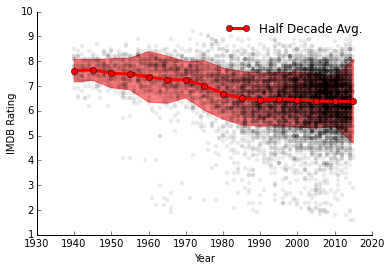

In [32]:
hdecade_std = data.groupby(hdecades).score.std()

plt.plot(hdecades_mean.index, hdecades_mean.values, 'o-', color='r',
        lw=3, label='Half Decade Avg.')

plt.fill_between(hdecades_mean.index, (hdecades_mean + hdecade_std).values, 
                 (hdecades_mean - hdecade_std).values, color='r', alpha=0.5)

plt.scatter(data.year, data.score, lw=0, alpha=0.08, color='k')

plt.xlabel("Year")
plt.ylabel("IMDB Rating")
plt.legend(frameon=False)
remove_border()

You can also iterate over a `GroupBy` object. Each iteration yields two variables: one of the distinct values of the group key, and the subset of the dataframe where the key equals that value. To find the most popular movie each year:

In [33]:
for year, subset in data.groupby('year'):
    print year, subset[subset.score == subset.score.max()].title.values

1940 ['The Great Dictator']
1941 ['Citizen Kane']
1942 ['Casablanca']
1943 ['The Ox-Bow Incident' 'The Life and Death of Colonel Blimp']
1944 ['Double Indemnity']
1945 ['Children of Paradise']
1946 ["It's a Wonderful Life"]
1947 ['Out of the Past']
1948 ['Bicycle Thieves' 'I Remember Mama']
1949 ['The Third Man']
1950 ['Sunset Blvd.']
1951 ['Ace in the Hole' 'Early Summer']
1952 ["Singin' in the Rain"]
1953 ['The Wages of Fear' 'Tokyo Story']
1954 ['Seven Samurai']
1955 ['Diabolique' 'Rififi' 'Pather Panchali']
1956 ['A Man Escaped']
1957 ['12 Angry Men']
1958 ['Vertigo']
1959 ['North by Northwest']
1960 ['Psycho']
1961 ['Yojimbo']
1962 ['Harakiri']
1963 ['High and Low']
1964 ['Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb']
1965 ["Operation 'Y' & Other Shurik's Adventures"]
1966 ['The Good, the Bad and the Ugly']
1967 ['Samurai Rebellion' 'Kidnapping, Caucasian Style']
1968 ['Once Upon a Time in the West']
1969 ['The Diamond Arm']
1970 ['Michael the Brave']
1971

### Small multiples plots

Let's split up the movies by genre, and look at how their release year/runtime/IMDB score vary.
The distribution for all movies is shown as a grey background.

This isn't a standard groupby, so we can't use the `groupby` method here. A manual loop is needed.

/usr/lib/python2.7/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


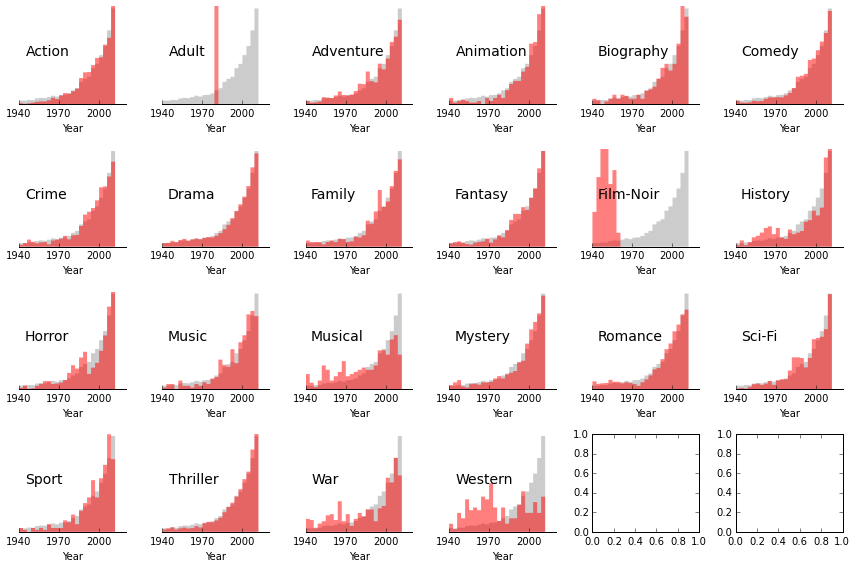

In [34]:
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(12,8), tight_layout=True)

bins = np.arange(1940, 2015, 3)

for ax, genre in zip(axes.ravel(), genres):
    ax.hist(data[data[genre] == True].year, bins=bins,
            histtype='stepfilled', normed=True, color='r', ec='none', alpha=0.5)
    
    ax.hist(data.year, bins=bins, histtype='stepfilled', normed=True, ec='none', zorder=0, color='#cccccc')
    remove_border(ax,left=False)
    ax.set_xlabel('Year')
    ax.xaxis.set_ticks(np.arange(1940, 2015, 30))
    ax.annotate(genre, xy=(1945, 3e-2), fontsize=14)
    ax.set_yticks([])

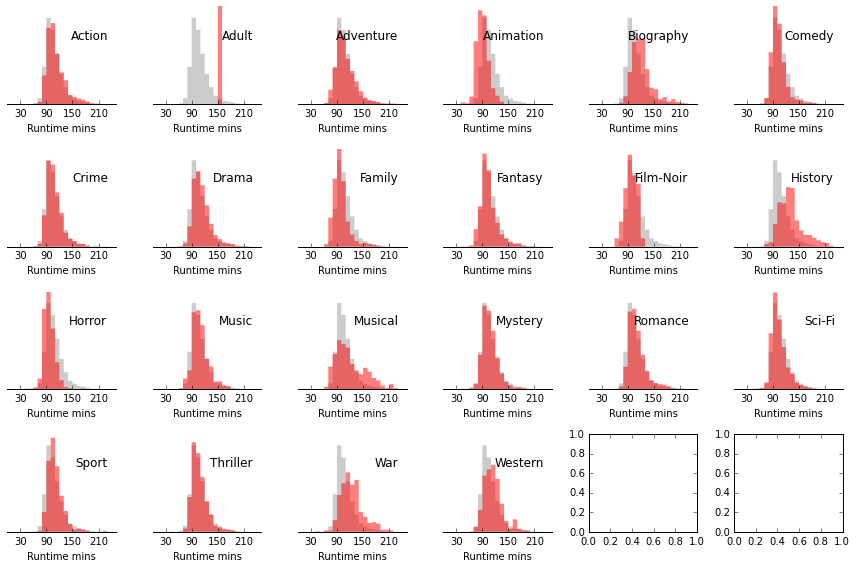

In [35]:
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(12,8), tight_layout=True)

bins = np.arange(30, 240, 10)

for ax, genre in zip(axes.ravel(), genres):
    ax.hist(data[data[genre] == True].runtime, bins=bins,
            histtype='stepfilled', normed=True, color='r', ec='none', alpha=0.5)
    
    ax.hist(data.runtime, bins=bins, histtype='stepfilled', normed=True, ec='none', zorder=0, color='#cccccc')
    remove_border(ax,left=False)
    ax.set_xlabel("Runtime mins")
    ax.xaxis.set_ticks(np.arange(30, 240, 60))
    ax.annotate(genre, xy=(230, .02), fontsize=12, ha='right')
    ax.set_yticks([])

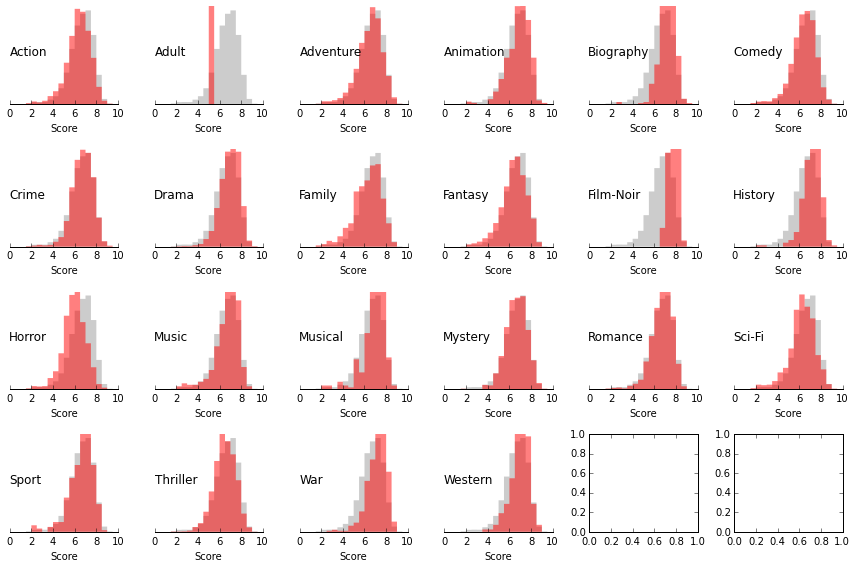

In [36]:
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(12,8), tight_layout=True)

bins = np.arange(0, 10, 0.5)

for ax, genre in zip(axes.ravel(), genres):
    ax.hist(data[data[genre] == True].score, bins=bins,
            histtype='stepfilled', normed=True, color='r', ec='none', alpha=0.5)
    
    ax.hist(data.score, bins=bins, histtype='stepfilled', normed=True, ec='none', zorder=0, color='#cccccc')
    remove_border(ax,left=False)
    ax.set_xlabel("Score")
    ax.annotate(genre, xy=(0, .2), fontsize=12, ha='left')
    ax.set_ylim(0, .4)
    ax.set_yticks([])

*css tweaks in this cell*

<style> 
div.text_cell_render {
    line-height: 135%;
    font-size: 110%;
    width: 800px; 
    margin-left:50px;
    margin-right:auto;
    }
    
li {
    line-height: 135%;
}
</style>